## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# __Importing Pandas/Numpy/Zipfile__

In [1]:
# importing pandas, numpy and zipfile
import zipfile
import pandas as pd
import datetime
import numpy as np
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import font_manager
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import sqlite3
from datetime import datetime
import requests
import gzip
import zipfile
import csv 

# __Data #1 - TV Movies Budget (from class - box office mogo)__

In [3]:
## opening read file
budget = pd.read_csv('data/tn.movie_budgets.csv.gz',compression='gzip')

In [4]:
## removing $ and , from Production Budget and and changing type to integer

budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['production_budget'] = budget['production_budget'].astype(int)

## removing $ and , from Domestic Gross and and changing type to integer

budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].astype(int)

## removing $ and , from Worldwide Gross and changing type to integer

budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].astype(int)

In [5]:
# creating new column release year

budget['release_year'] = pd.DatetimeIndex(budget['release_date']).year

In [6]:
# changing type of release Date to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [7]:
# converting 'release_date' column type from integer to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [8]:
# renaming movie column to title
budget = budget.rename(columns = {"movie":"title"})

# _Data #1  - analyzing TV movies Budget_

In [9]:
#finding datset age range and ranges 105 years

oldest_movie = min(budget['release_date'])
newest_movie = max(budget['release_date'])
movie_range = relativedelta(newest_movie, oldest_movie).years

print(oldest_movie)
print(newest_movie)
print(movie_range)

1915-02-08 00:00:00
2020-12-31 00:00:00
105


In [10]:
##defining and sorting top 20 grossing movies

top_gross_movies = budget.sort_values(by="worldwide_gross",ascending=False).head(20)
top_gross_movies


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011


# Data Source #2 - Top Rated Movies - pulled from TMBD API

- This data source was pulled from TBBD's API on 3/20

In [11]:
top_movies = pd.read_csv("data/tmbd_top_400_rated_movies.csv")

In [12]:
top_movies = top_movies.drop(['original_language', 'original_title', 'overview',
                              'backdrop_path', 'poster_path', 'popularity'], axis=1)

In [13]:
top_movies = top_movies.reset_index(drop=True)

In [14]:
split_genres = pd.DataFrame(top_movies['genre_ids'].str.split().values.tolist())

In [15]:
# defining a function to remove the brackets

column = [0, 1, 2, 3, 4, 5, 6, 7, 8]

def replace_char(split_genres, columns, char, rep):
   for column in columns:
    split_genres[column] = split_genres[column].str.replace(char, rep)
    
replace_char(split_genres, column, '[',"")
replace_char(split_genres, column , ']',"")
replace_char(split_genres, column, ',',"")

In [16]:
#replacing none with 0
split_genres = split_genres.fillna(0)

#renaming the columns
split_genres = split_genres.rename(columns=lambda x: f'genre_id_{x+1}')

#dropping columns
split_genres.drop(columns=['genre_id_6','genre_id_7','genre_id_8','genre_id_9'], inplace=True)

#concat top_movies and split_genres into one df
top_movies = pd.concat([top_movies, split_genres], axis=1)

#dropping empty column
top_movies.drop(index=[3619,5416], inplace=True)

#resetting index
top_movies = top_movies.reset_index(drop=True)

In [17]:
top_movies.head()

,adult,genre_ids,id,release_date,title,video,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5
0,False,"[18, 80]",238,1972-03-14,The Godfather,False,8.7,17567,18,80,0,0,0
1,False,"[18, 80]",278,1994-09-23,The Shawshank Redemption,False,8.7,23403,18,80,0,0,0
2,False,"[35, 14]",772071,2022-09-14,Cuando Sea Joven,False,8.7,209,35,14,0,0,0
3,False,"[16, 10751, 12, 14]",995133,2022-12-25,"The Boy, the Mole, the Fox and the Horse",False,8.6,251,16,10751,12,14,0
4,False,"[18, 80]",240,1974-12-20,The Godfather Part II,False,8.6,10636,18,80,0,0,0


In [18]:
# converting column type from float64 to int

top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5']] = top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5']].astype(int)

In [19]:
# converting column type from float64 to int

columns_genre = ['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5']

for col in columns_genre:
    
    top_movies[col] = top_movies[col].astype(int)

In [20]:
# changing title type to string
top_movies['title'] = top_movies['title'].astype('str')

In [21]:
##converting 'release_date' column type from integer to datetime

top_movies['release_date'] = pd.to_datetime(top_movies['release_date'])

In [22]:
# information about first and last movie entry in data

first_movie = min(top_movies['release_date'])
last_movie = max(top_movies['release_date'])

print(first_movie)
print(last_movie)

1895-06-10 00:00:00
2023-03-01 00:00:00


In [23]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   adult         7998 non-null   bool          
 1   genre_ids     7998 non-null   object        
 2   id            7998 non-null   int64         
 3   release_date  7998 non-null   datetime64[ns]
 4   title         7998 non-null   object        
 5   video         7998 non-null   bool          
 6   vote_average  7998 non-null   float64       
 7   vote_count    7998 non-null   int64         
 8   genre_id_1    7998 non-null   int64         
 9   genre_id_2    7998 non-null   int64         
 10  genre_id_3    7998 non-null   int64         
 11  genre_id_4    7998 non-null   int64         
 12  genre_id_5    7998 non-null   int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 703.1+ KB


In [42]:
top_8000_list

[238,
 278,
 772071,
 995133,
 240,
 424,
 19404,
 129,
 389,
 372058,
 496243,
 155,
 497,
 680,
 429,
 13,
 122,
 696374,
 372754,
 769,
 11216,
 346,
 637,
 704264,
 724089,
 311,
 12477,
 539,
 550,
 510,
 761053,
 667257,
 620249,
 598,
 324857,
 315162,
 4935,
 14537,
 120,
 378064,
 92321,
 1891,
 157336,
 851644,
 423,
 652837,
 244786,
 121,
 40096,
 599,
 18491,
 807,
 27205,
 553512,
 567,
 73,
 3782,
 914,
 255709,
 274,
 901,
 128,
 795607,
 12493,
 101,
 207,
 644479,
 3082,
 20334,
 105,
 441130,
 533514,
 283566,
 361743,
 568300,
 527641,
 630566,
 335,
 568332,
 25237,
 28,
 29259,
 975,
 632632,
 16672,
 555604,
 635302,
 447362,
 10494,
 637920,
 77338,
 10376,
 618344,
 265177,
 299534,
 670,
 797,
 508965,
 299536,
 575813,
 1585,
 8587,
 290098,
 537061,
 15804,
 42269,
 490132,
 18148,
 31414,
 572154,
 110420,
 5156,
 556574,
 522924,
 755812,
 24188,
 354912,
 284,
 694,
 37257,
 518068,
 185,
 762975,
 810693,
 791373,
 490,
 504253,
 610892,
 10098,
 16869,


In [41]:
top_8000_list = top_movies.id.values.tolist()

In [25]:
#import requests
#import pandas as pd

#making a list of the movie ids to pull additional movie information
#top_8000_list = top_movies.id.values.tolist()

# empty list
#data_list = []

# loop to iterate
#for movie_id in top_8000_list:
    # make a request to the API with the current page number
    #response = requests.get(''f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US''')

    # response
    #data = response.json()
    
    #append data to list
    #data_list.append(data)

In [26]:
# #making a list of the movie ids to pull movie ratings

# # empty list
# data_list_cert = []

# # loop to iterate
# for movie_id in top_8000_list :
#     # make a request to the API with the current page number
#     response = requests.get(''f'https://api.themoviedb.org/3/movie/{movie_id}/release_dates?api_key=a88e9a2c082e4caa0a1447a81f7e743b''')

#     # response
#     data = response.json()['results']
    
#     #append data to list
#     data_list_cert.append(data)

NameError: name 'top_8000_list' is not defined

In [27]:
#data_list_cert_df = pd.DataFrame(data_list_cert)

#data_list_cert_df.to_csv("data_list_cert_df.csv")

In [145]:
data_list_cert_df = pd.read_csv("data/data_list_cert_df_2.csv")

In [146]:
data_list_cert_df

,Unnamed: 0,0
0,17,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
1,18,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
2,23,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
3,30,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
4,43,"{'iso_3166_1': 'KR', 'release_dates': [{'certi..."
...,...,...
1158,7940,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
1159,7964,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
1160,7968,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."
1161,7971,"{'iso_3166_1': 'US', 'release_dates': [{'certi..."


In [147]:
data_list_cert_df = data_list_cert_df['release_dates'].apply(pd.Series)
data_list_cert_df.to_csv("test_certification.csv")

KeyError: 'release_dates'

In [148]:
top_movies_id = pd.DataFrame(top_movies['id'])

In [149]:
top_movies_id

,id
0,238
1,278
2,772071
3,995133
4,240
...,...
7993,11858
7994,410199
7995,294793
7996,77951


In [150]:
cert_df = pd.concat([top_movies_id, data_list_cert_df], axis=1)

In [151]:
cert_df.set_index('id', inplace=True)

In [152]:
#creating filtered list for ratingg in the US
filtered_list = [d for sublist in data_list_cert for d in sublist if d.get('iso_3166_1') == 'US']
filtered_list

[]

In [153]:
#creating dataframe from API dictionary
df = pd.DataFrame(filtered_list)

#unpacking dictionary into new columns
df = df['release_dates'].apply(pd.Series)

#saving first rating column
df = df[[0]]

#unpacking dictionary into new columns
df = df[0].apply(pd.Series)

KeyError: 'release_dates'

In [154]:
#sanity_check
df

""


In [155]:
#creating dataframe from API dictionary
final_movie = pd.DataFrame.from_dict(data_list)

#saving as csv
final_movie.to_csv("finalmovie.csv")

NameError: name 'data_list' is not defined

In [161]:
final_movie = pd.read_csv("data/finalmovie.csv")

In [162]:
movie_api = final_movie

In [163]:
movie_api = movie_api[['revenue', 'budget', 'title','vote_average','vote_count', 'runtime']]

In [164]:
movie_api['gross'] = movie_api.apply(lambda x :x['revenue'] - x['budget'], axis=1)

<ipython-input-164-ab018971cb1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_api['gross'] = movie_api.apply(lambda x :x['revenue'] - x['budget'], axis=1)


In [165]:
movie_api.rename(columns={'title': 'title_2'}, inplace=True)

/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [166]:
movie_api

,revenue,budget,title_2,vote_average,vote_count,runtime,gross
0,245066411,6000000,The Godfather,8.710,17709,175,239066411
1,28341469,25000000,The Shawshank Redemption,8.702,23560,142,3341469
2,0,0,Cuando Sea Joven,8.629,213,115,0
3,0,0,"The Boy, the Mole, the Fox and the Horse",8.481,297,34,0
4,102600000,13000000,The Godfather Part II,8.597,10726,202,89600000
...,...,...,...,...,...,...,...
7993,24332324,40000000,Renaissance Man,6.093,253,128,-15667676
7994,0,2000000,ARQ,6.090,1038,88,-2000000
7995,0,0,All the Old Knives,6.100,414,101,0
7996,126546518,80000000,Walking with Dinosaurs,6.096,418,87,46546518


## Joining genre and revenue dfs to create final df

In [167]:
movie_api.drop(columns=['vote_average', 'vote_count'], inplace=True)

/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [168]:
movie_api = 

SyntaxError: invalid syntax (<ipython-input-168-22d7ed7ac6db>, line 1)

In [169]:
#concat genres based on index numebr
movie_genre_rev = pd.concat([top_movies, movie_api, ], axis=1)

In [170]:
movie_genre_rev

,adult,genre_ids,id,release_date,title,video,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,revenue,budget,title_2,runtime,gross
0,False,"[18, 80]",238,1972-03-14,The Godfather,False,8.7,17567,18,80,0,0,0,245066411,6000000,The Godfather,175,239066411
1,False,"[18, 80]",278,1994-09-23,The Shawshank Redemption,False,8.7,23403,18,80,0,0,0,28341469,25000000,The Shawshank Redemption,142,3341469
2,False,"[35, 14]",772071,2022-09-14,Cuando Sea Joven,False,8.7,209,35,14,0,0,0,0,0,Cuando Sea Joven,115,0
3,False,"[16, 10751, 12, 14]",995133,2022-12-25,"The Boy, the Mole, the Fox and the Horse",False,8.6,251,16,10751,12,14,0,0,0,"The Boy, the Mole, the Fox and the Horse",34,0
4,False,"[18, 80]",240,1974-12-20,The Godfather Part II,False,8.6,10636,18,80,0,0,0,102600000,13000000,The Godfather Part II,202,89600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,False,"[35, 18]",11858,1994-06-03,Renaissance Man,False,6.1,252,35,18,0,0,0,24332324,40000000,Renaissance Man,128,-15667676
7994,False,"[878, 53]",410199,2016-09-16,ARQ,False,6.1,1035,878,53,0,0,0,0,2000000,ARQ,88,-2000000
7995,False,"[53, 28]",294793,2022-04-08,All the Old Knives,False,6.1,409,53,28,0,0,0,0,0,All the Old Knives,101,0
7996,False,"[16, 10751, 12]",77951,2013-12-18,Walking with Dinosaurs,False,6.1,415,16,10751,12,0,0,126546518,80000000,Walking with Dinosaurs,87,46546518


In [171]:
#sanity check of titles and dropping 2nd title column
movie_genre_rev.drop(columns=['title_2', 'video', 'adult'], inplace=True)

In [172]:
movie_genre_rev.drop(columns='genre_ids', inplace=True)

In [173]:
movie_genre_rev

,id,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,revenue,budget,runtime,gross
0,238,1972-03-14,The Godfather,8.7,17567,18,80,0,0,0,245066411,6000000,175,239066411
1,278,1994-09-23,The Shawshank Redemption,8.7,23403,18,80,0,0,0,28341469,25000000,142,3341469
2,772071,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,0,0,0,115,0
3,995133,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,251,16,10751,12,14,0,0,0,34,0
4,240,1974-12-20,The Godfather Part II,8.6,10636,18,80,0,0,0,102600000,13000000,202,89600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,11858,1994-06-03,Renaissance Man,6.1,252,35,18,0,0,0,24332324,40000000,128,-15667676
7994,410199,2016-09-16,ARQ,6.1,1035,878,53,0,0,0,0,2000000,88,-2000000
7995,294793,2022-04-08,All the Old Knives,6.1,409,53,28,0,0,0,0,0,101,0
7996,77951,2013-12-18,Walking with Dinosaurs,6.1,415,16,10751,12,0,0,126546518,80000000,87,46546518


## Cleaning movie_genre_rev dataframe


In [174]:
movie_genre_rev.drop(columns=['genre_ids', 'adult'], inplace=True)

KeyError: "['genre_ids' 'adult'] not found in axis"

In [175]:
movie_genre_rev_final = movie_genre_rev.loc[movie_genre_rev['revenue'] != 0]

In [176]:
#checking for null values
movie_genre_rev_final.head()

,id,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,revenue,budget,runtime,gross
0,238,1972-03-14,The Godfather,8.7,17567,18,80,0,0,0,245066411,6000000,175,239066411
1,278,1994-09-23,The Shawshank Redemption,8.7,23403,18,80,0,0,0,28341469,25000000,142,3341469
4,240,1974-12-20,The Godfather Part II,8.6,10636,18,80,0,0,0,102600000,13000000,202,89600000
5,424,1993-12-15,Schindler's List,8.6,13836,18,36,10752,0,0,321365567,22000000,195,299365567
6,19404,1995-10-19,Dilwale Dulhania Le Jayenge,8.6,4072,35,18,10749,0,0,100000000,13200000,190,86800000


# Data Source #2  - Analyzing & Visualizing

In [177]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   adult         7998 non-null   bool          
 1   genre_ids     7998 non-null   object        
 2   id            7998 non-null   int64         
 3   release_date  7998 non-null   datetime64[ns]
 4   title         7998 non-null   object        
 5   video         7998 non-null   bool          
 6   vote_average  7998 non-null   float64       
 7   vote_count    7998 non-null   int64         
 8   genre_id_1    7998 non-null   int64         
 9   genre_id_2    7998 non-null   int64         
 10  genre_id_3    7998 non-null   int64         
 11  genre_id_4    7998 non-null   int64         
 12  genre_id_5    7998 non-null   int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 703.1+ KB


In [178]:
# creating df of most popular films by popularity

most_popular = top_movies.sort_values(by='popularity',ascending=False).head(20)

KeyError: 'popularity'

In [179]:
# creating new dataframe with only the top genres

top_genres = top_movies[['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']].apply(pd.Series.value_counts)

In [180]:
# changing N/A variables to 0
top_genres = top_genres.fillna(0)

In [181]:
# creating a genre total column that sums up the total values and making it a integer
top_genres['genre_total'] = top_genres.sum(axis=1)

In [182]:
# dropping first row
top_genres.drop([0],inplace=True)

In [183]:
# creating column with the genre names

top_genres['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror',
                            'Action','Comedy','History','Western','Thriller',
                            'Crime','Science Fiction', 'Mystery', 'Music','Romance',
                            'Family', 'War', 'TV Movie']

In [184]:
# creating a percent column

top_genres['percent'] = ((top_genres['genre_total'] / top_genres['genre_total'].sum()) * 100)


In [185]:
# creating new df with only the genre ids to graph

top_genres_total= top_genres.drop(columns=['genre_id_1', 'genre_id_2','genre_id_3','genre_id_4',
                                          'genre_id_5'])

In [186]:
##changing order of the columns

top_genres_total = top_genres_total [['genre_name', 'genre_total']]
top_genres_total = top_genres_total.sort_values(by='genre_total',ascending=False).head(20)

In [187]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   adult         7998 non-null   bool          
 1   genre_ids     7998 non-null   object        
 2   id            7998 non-null   int64         
 3   release_date  7998 non-null   datetime64[ns]
 4   title         7998 non-null   object        
 5   video         7998 non-null   bool          
 6   vote_average  7998 non-null   float64       
 7   vote_count    7998 non-null   int64         
 8   genre_id_1    7998 non-null   int64         
 9   genre_id_2    7998 non-null   int64         
 10  genre_id_3    7998 non-null   int64         
 11  genre_id_4    7998 non-null   int64         
 12  genre_id_5    7998 non-null   int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 703.1+ KB


In [188]:
top_movies['genre_id_1'].value_counts()

18       2144
35       1525
28        935
16        506
27        457
12        451
80        418
53        345
10749     243
10751     227
878       196
14        172
10752      88
9648       88
10402      70
37         65
36         44
10770      24
Name: genre_id_1, dtype: int64

# Data Source #2 -  Analyzing Sub-genres

In [281]:
def check_genre(genre_1, genre_2):
    
    #genre_1   
    genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
    sub_genre_one = top_movies[genre_columns_one].isin([f'{genre_1}']).any(axis=1)
    top_sub_genres_one = top_movies[sub_genre_one]

    #genre_2
    genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
    sub_genre_two = top_movies[genre_columns_two].isin([f'{genre_2}']).any(axis=1)
    top_sub_genres_two = top_movies[sub_genre_two]

    
    #merge based on title
    merged_genre = pd.merge(top_sub_genres_one, top_sub_genres_two, on="title", how="inner",left_index=True,right_index=True, suffixes=('', '_remove'))
 
    #remove the duplicate columns
    merged_genre.drop([i for i in merged_genre.columns if 'remove' in i],axis=1, inplace=True)
    
    #store merged_genre in a dictionary with a dynamically generated key
    merged_genre_dict = {f"merged_genre_{genre_1}_{genre_2}": merged_genre}
    
    # concatenate the values of the dictionary into a single DataFrame
    merged_df = pd.concat(merged_genre_dict.values(), axis=0)

    return merged_df

In [282]:
check_genre(10571,12)

,adult,genre_ids,id,release_date,video,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,title


In [283]:
check_genre(18,12)

,adult,genre_ids,id,release_date,title,video,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5
23,False,"[28, 12, 16, 18]",704264,2019-11-21,Primal: Tales of Savagery,False,8.5,258,28,12,16,18,0
42,False,"[12, 18, 878]",157336,2014-11-05,Interstellar,False,8.4,30744,12,18,878,0,0
131,False,"[28, 18, 12]",98,2000-05-04,Gladiator,False,8.2,16190,28,18,12,0,0
267,False,"[28, 12, 18]",9764,1975-08-02,Dersu Uzala,False,8.0,415,28,12,18,0,0
272,False,"[10751, 12, 18]",522518,2019-05-03,A Dog's Journey,False,8.0,1276,10751,12,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7702,False,"[28, 12, 18, 53]",9619,1997-02-07,Dante's Peak,False,6.2,1592,28,12,18,53,0
7870,False,"[28, 12, 18]",20187,1975-05-21,The Eiger Sanction,False,6.1,310,28,12,18,0,0
7893,False,"[28, 12, 18]",263341,2016-02-18,"Crouching Tiger, Hidden Dragon: Sword of Destiny",False,6.1,562,28,12,18,0,0
7917,False,"[28, 36, 12, 18]",335778,2016-02-18,Risen,False,6.1,720,28,36,12,18,0


In [284]:
merged_genre_18_12

NameError: name 'merged_genre_18_12' is not defined

In [ ]:
# ADVENTURE DRAMA

# could not figure out how to do this in a loop, so used the isin statement
#to pull records that have the genre from all genre columns and then merged the records and removed duplicates
# https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns

#genre 1 - ADVENTURE

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]

#genre 2 - DRAMA
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([12]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]

#merge based on title

merged_genre_18_12 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_12.drop([i for i in merged_genre_18_12.columns if 'remove' in i],
               axis=1, inplace=True)

In [192]:
# COMEDY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - COMEDY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([35]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_35 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_35.drop([i for i in merged_genre_18_35.columns if 'remove' in i],
               axis=1, inplace=True)

In [193]:
# COMEDY ROMANCE

#genre 1 - COMEDY

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([35]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ROMANCE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([10749]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_35_10749 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_35_10749.drop([i for i in merged_genre_35_10749.columns if 'remove' in i],
               axis=1, inplace=True)

In [194]:
# FANTASY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([14]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_14 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_14.drop([i for i in merged_genre_18_14.columns if 'remove' in i],
               axis=1, inplace=True)

In [195]:
# ROMANCE DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ROMANCE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([10749]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_10749 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_10749.drop([i for i in merged_genre_18_10749.columns if 'remove' in i],
               axis=1, inplace=True)

In [196]:
# ACTION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ACTION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([28]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_28 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_28.drop([i for i in merged_genre_18_28.columns if 'remove' in i],
               axis=1, inplace=True)

In [197]:
# CRIME DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - CRIME
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([80]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_80 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_80.drop([i for i in merged_genre_18_80.columns if 'remove' in i],
               axis=1, inplace=True)

In [198]:
# THRILLER DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([53]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_53 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_53.drop([i for i in merged_genre_18_53.columns if 'remove' in i],
               axis=1, inplace=True)

In [199]:
# ANIMATION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([35]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ANIMATION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([16]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_35_16 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_35_16.drop([i for i in merged_genre_35_16.columns if 'remove' in i],
               axis=1, inplace=True)

In [200]:
# ANIMATION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = top_movies[genre_columns_one].isin([35]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ANIMATION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([16]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_35_16 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_35_16.drop([i for i in merged_genre_35_16.columns if 'remove' in i],
               axis=1, inplace=True)

In [201]:
# creating new dataframe with lenths of sub-genres
genre_data = [len(merged_genre_18_12.index), len(merged_genre_18_35.index),
              len(merged_genre_18_14.index), len(merged_genre_18_10749.index), len(merged_genre_18_28.index),
              len(merged_genre_18_80.index),len(merged_genre_18_53.index),len(merged_genre_35_10749.index), len(merged_genre_35_16.index)]

genre_data_graph = pd.DataFrame(genre_data, columns = ['genre_total'])

# naming the columns based on the genre keys
no_drama = ['Adventure Drama', 'Comedy Drama', 'Fantasy Drama', 'Romance Drama', 'Action Drama','Crime Drama','Thriller Drama',
           'Comedy-Romance', 'Animation Drama']

genre_data_graph['genre_name'] = no_drama

# re-arranging column position
moving_genre = genre_data_graph.pop('genre_name')
  
genre_data_graph.insert(0, 'genre_name', moving_genre)

NameError: name 'merged_genre_18_12' is not defined

In [202]:
# sorting by genre total
sub_genre_sorted = genre_data_graph.sort_values(by='genre_total',ascending=False)
sub_genre_sorted

NameError: name 'genre_data_graph' is not defined

In [203]:
genre_sum = sub_genre_sorted['genre_total'].sum()
genre_sum 

NameError: name 'sub_genre_sorted' is not defined

# Data Source #2   - Looking at genres without 'Drama"

In [204]:
#creating dataframe from main top_genres and removing "drama" category as this might skew the data

top_genres_no_drama = top_genres_total

top_genres_no_drama = top_genres_no_drama.tail(-1)
top_genres_no_drama 

,genre_name,genre_total
35,Comedy,2762.0
53,Thriller,1885.0
28,Action,1684.0
10749,Romance,1437.0
12,Adventure,1240.0
80,Crime,1213.0
10751,Family,961.0
14,Fantasy,886.0
16,Animation,870.0
27,Horror,816.0


In [205]:
# creating percentage colum to represent breakdown of categories and rounding the floats

genre_breakdown = top_genres_no_drama

genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum() * 100))
genre_breakdown.percent = genre_breakdown.percent.round(2)

<ipython-input-205-f96965a37f5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum() * 100))
/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [206]:
# making dataframe with top 5

genre_top5 = genre_breakdown.head(5)

In [207]:
# resestting index

genre_breakdown = genre_breakdown.reset_index()
genre_breakdown.rename(columns = {'genre_name':'Genre'}, inplace = True)
genre_breakdown.rename(columns = {'percent':'Market Share %'}, inplace = True)

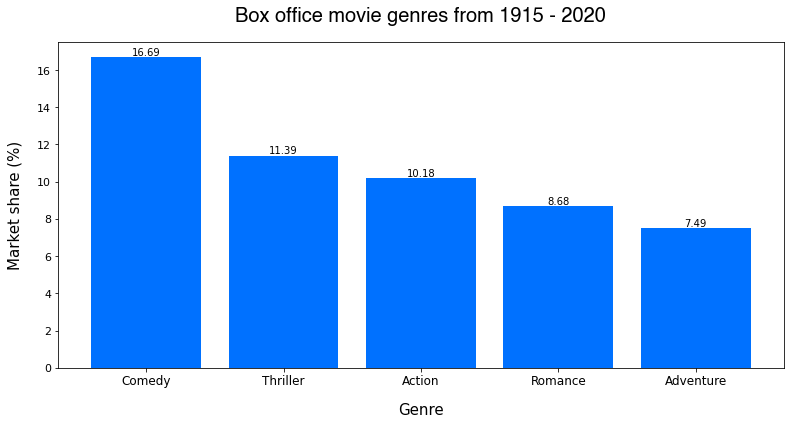

In [208]:
# creating x and y
x = genre_top5['genre_name']
y = genre_top5['percent']

# resizing & design
fig = plt.figure(figsize=(13, 6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}

# setting labels
plt.title('Box office movie genres from 1915 - 2020',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Genre',labelpad = 15, fontdict = {'fontsize' : 15} )
plt.ylabel('Market share (%)', labelpad = 15, fontdict = {'fontsize' : 15})

# making the bar
genre_graph = plt.bar(x, y,color=('#0071ff'))

for bar in genre_graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')


# Data Source #3 -  Box office revenue by genre - Numbers.com

In [209]:
#downloaded table from thenumbers.com website and created .csv file from the values

genre_data = pd.read_csv('data/top-movie-genres-by-total-box-office-revenue.csv')

In [210]:
#sorting the top give genre

genre_data_sorted = genre_data.head(5)

#turning share into percent and adjusting float to 2 places
genre_data_sorted['Share'] = genre_data_sorted['Share'] * 100
genre_data_sorted.Share = genre_data_sorted.Share.round(2)

<ipython-input-210-8dbda1d9f7a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data_sorted['Share'] = genre_data_sorted['Share'] * 100


In [211]:
# turning share into percent and adjusting float to 2 places

genre_data_sorted['Share'] = genre_data_sorted['Share'] * 100
genre_data_sorted.Share = genre_data_sorted.Share.round(2)

<ipython-input-211-b391baef7471>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data_sorted['Share'] = genre_data_sorted['Share'] * 100


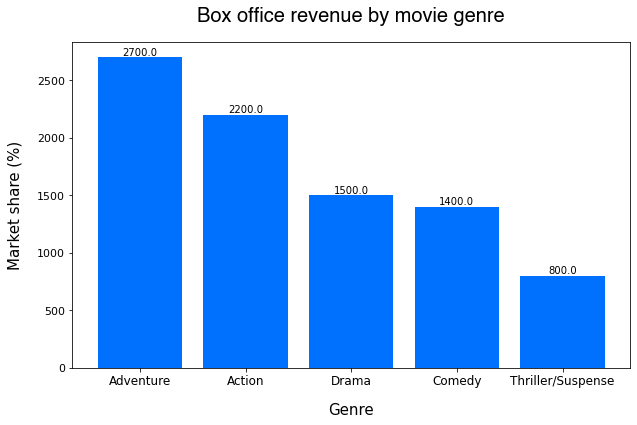

In [212]:
# creating x and y
x = genre_data_sorted['Genre']
y = genre_data_sorted['Share']

# resizing & design
fig = plt.figure(figsize=(10, 6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}
plt. grid(False)


# setting labels
plt.title('Box office revenue by movie genre',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Genre',labelpad = 15, fontdict = {'fontsize' : 15} )
plt.ylabel('Market share (%)', labelpad = 15, fontdict = {'fontsize' : 15})

# making the bar
genre_graph = plt.bar(x, y,color=('#0071ff'))

for bar in genre_graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom');

<ipython-input-213-c4eb05c71450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genre_rev_final['a_binned'] = pd.cut(movie_genre_rev_final['runtime'],bins=np.arange(60,250,30))


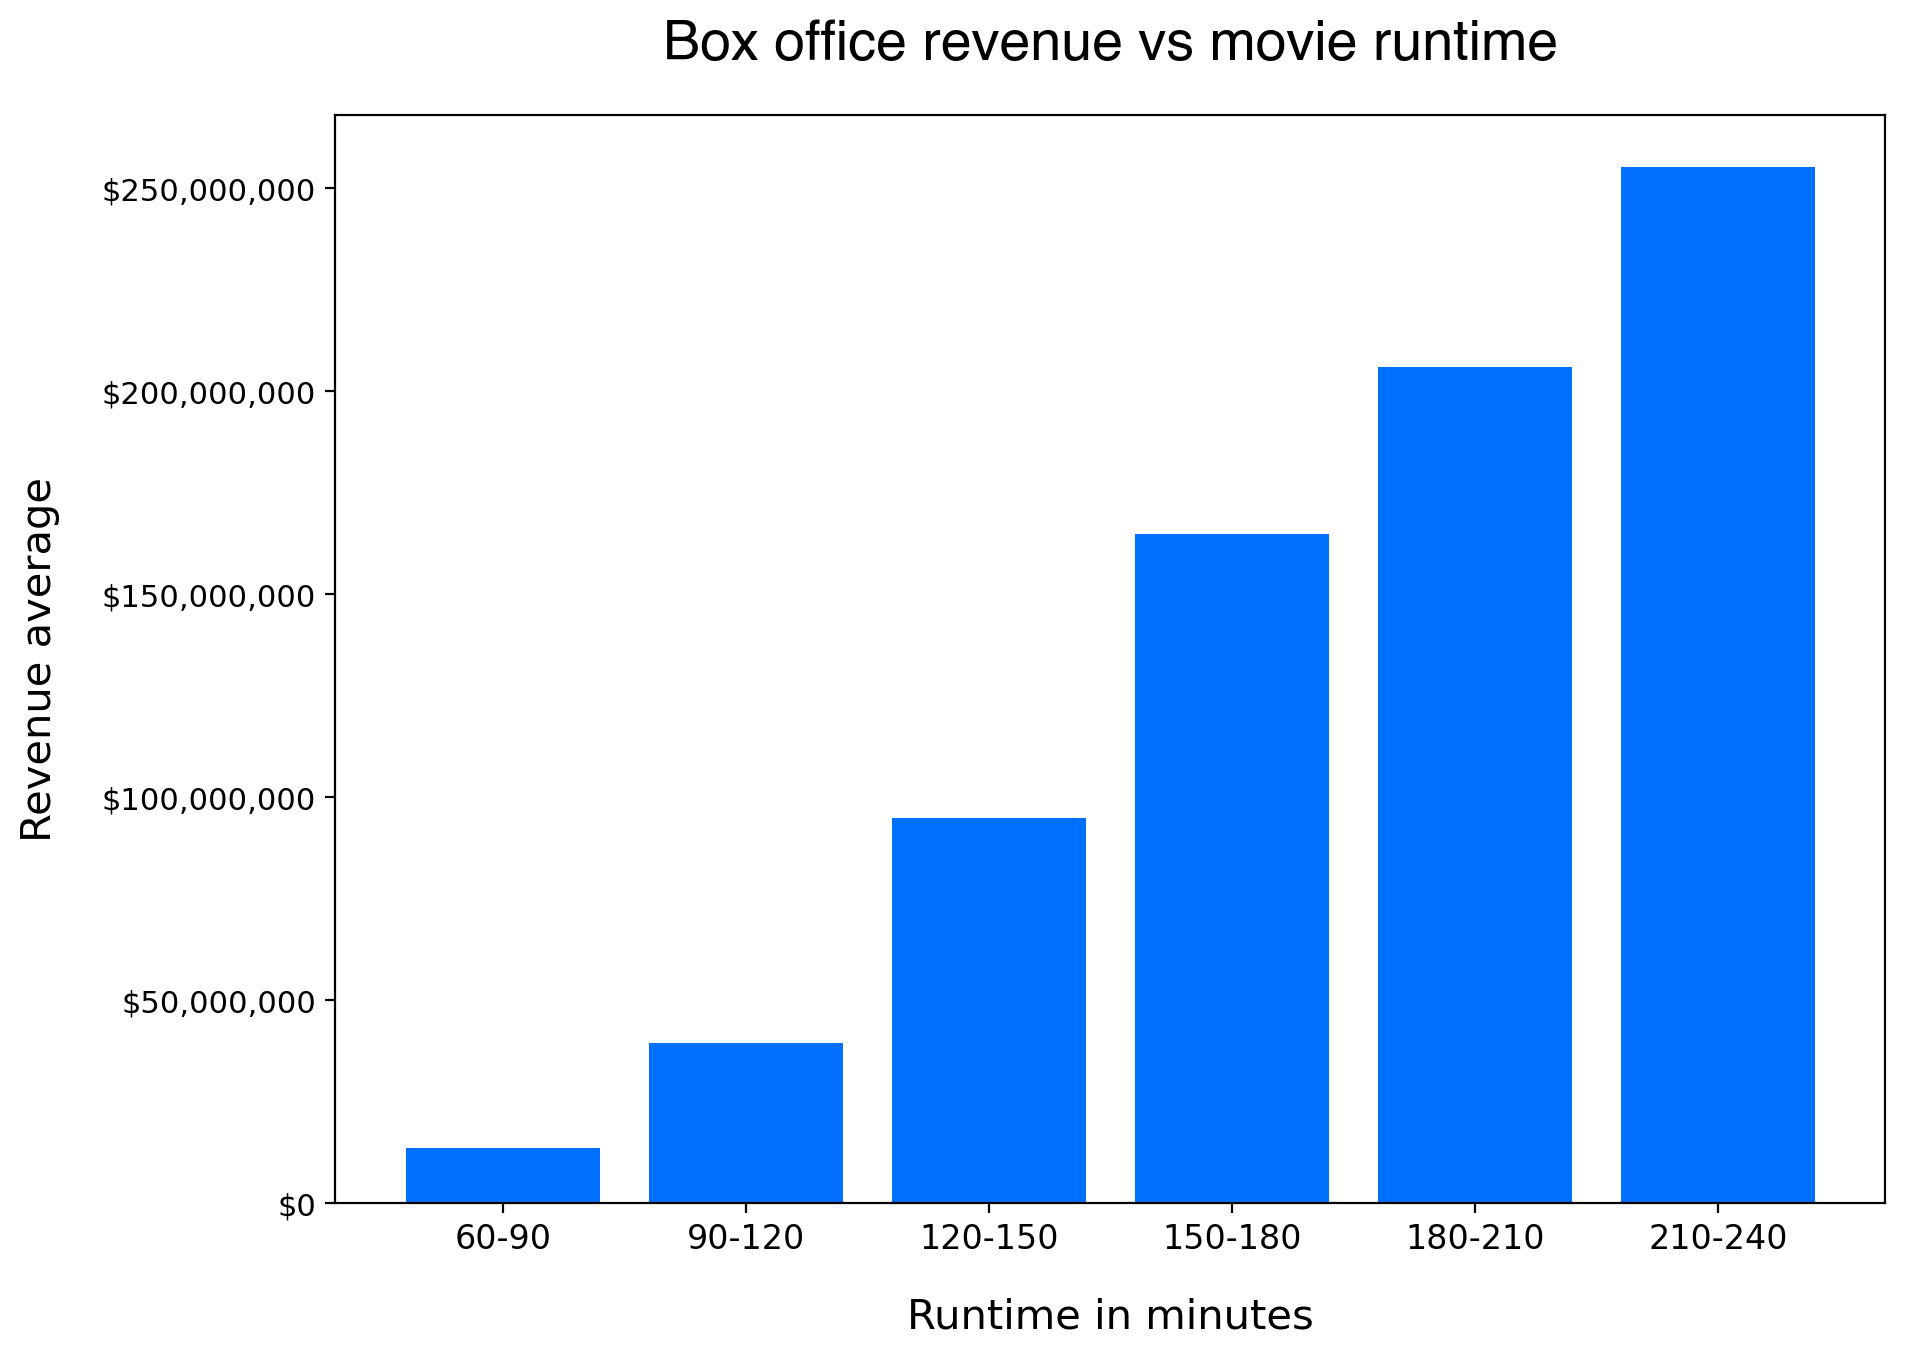

In [213]:
movie_genre_rev_final['a_binned'] = pd.cut(movie_genre_rev_final['runtime'],bins=np.arange(60,250,30))
movie_genre_rev_binned=movie_genre_rev_final.groupby(movie_genre_rev_final['a_binned'])['revenue'].median()

# resizing & design
fig = plt.figure(figsize=(10, 8), dpi=200)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}
plt. grid(False)

labels = ['60-90', '90-120', '120-150', '150-180','180-210','210-240']

plt.bar(range(len(movie_genre_rev_binned)),movie_genre_rev_binned.cumsum().values, color=('#0071ff'))
plt.xticks(range(len(movie_genre_rev_binned)), labels, rotation=90)

# resizing & design

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# setting labels
plt.title('Box office revenue vs movie runtime',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Runtime in minutes',labelpad = 15, fontdict = {'fontsize' : 15})
plt.ylabel('Revenue average', labelpad = 15, fontdict = {'fontsize' : 15})

#centering x-axis labels
plt.gcf().autofmt_xdate(rotation=0, ha="center")

# Data Source #4 & 5


In [214]:
minfo=pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')

# Minfo Inspection

In [215]:
#A basic overview of the first 5 rows!
minfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [216]:
#checking data types
minfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [217]:
#Checking NA's in files
minfo.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

# Organizing

In [218]:
#Dropping all columns both irrelevant and littered with NA's
minfo.drop(columns = ['synopsis', 'currency', 'dvd_date', 'theater_date'], inplace=True )

#drops na's in the subset box_office, ratnings columns
minfo.dropna(subset = ['box_office','rating'], inplace = True)
minfo

,id,rating,genre,director,writer,box_office,runtime,studio
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"600,000",108 minutes,Entertainment One
6,10,PG-13,Comedy,Jake Kasdan,Mike White,"41,032,915",82 minutes,Paramount Pictures
7,13,R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"224,114",123 minutes,Sony Pictures Classics
8,14,R,Drama,Taylor Hackford,Mark Jacobson,"134,904",117 minutes,NaN
15,22,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...
1541,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"25,335,935",119 minutes,Universal Pictures
1542,1981,NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"1,416,189",129 minutes,Eros Entertainment
1545,1985,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"59,371",98 minutes,IDP Distribution
1546,1986,PG,Art House and International|Comedy|Drama,NaN,NaN,"794,306",97 minutes,NaN


# Cleaning

In [219]:
#removing string minutes
minfo['box_office'] = minfo['box_office'].str.replace(',','')
minfo['box_office'] = minfo['box_office'].str.replace(' ','')

#converted into float
minfo['box_office'] = minfo['box_office'].astype(float)

#creating a grouped by rating variable with a median value
minfo_ratinggrouped = minfo.groupby(by='rating').median()

#indexing the value
minfo_ratinggrouped.index

#sorting the variable of minfo_ratinggrouped values in numerical order 
minfo_ratinggrouped = minfo_ratinggrouped.sort_values('box_office', ascending=False)

#X values #height value
x = minfo_ratinggrouped.index
height = minfo_ratinggrouped['box_office']

# Graphing

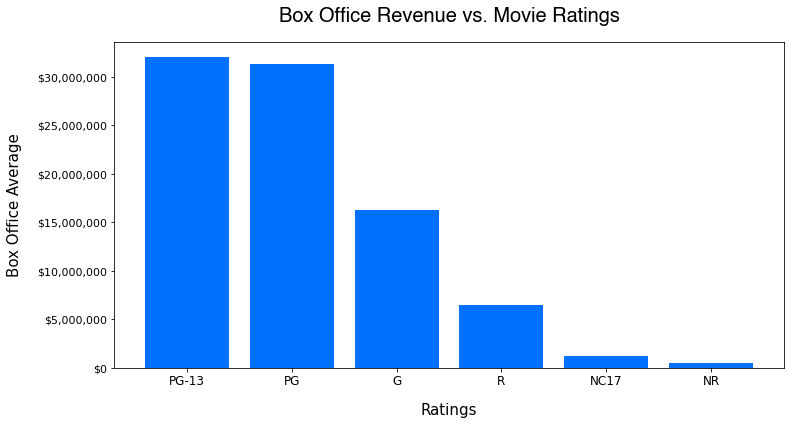

In [220]:
import matplotlib.ticker as ticker

#X values #height value
x = minfo_ratinggrouped.index
y = minfo_ratinggrouped['box_office']

# resizing & design
fig = plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}

# setting labels
plt.title('Box Office Revenue vs. Movie Ratings',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Ratings',labelpad = 15, fontdict = {'fontsize' : 15})
plt.ylabel('Box Office Average', labelpad = 15, fontdict = {'fontsize' : 15})

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# making the bar
genre_graph = plt.bar(x, y,color=('#0071ff'))


# Data Source #6

## Twitch video game data
- To further inspect popular Microsoft owned video game franchises and how Microsoft's pending acquisition of **Activision Blizzard**, a leading American video game holding company, will impact their influence in the gaming space, we pull twitch data
- Downloaded a .csv with 2021, 2022 and 2023 top 50 most popular twitch games from https://sullygnome.com/games/2022/streamed
- I added two additional columns in excel that include the name of the company or developer that owns the video game. In the dataset, there were a few Twitch categories that were saved as games (i.e. Art, Just Chatting, Music), so I removed these. I also removed games that were mobile only.

In [221]:
# importing data and saving as dataframe
twitch_2021 = pd.read_csv("data/top_50_twich_2021_2023.csv")

In [222]:
# inspecting
twitch_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          127 non-null    int64  
 1   year                127 non-null    int64  
 2   game_title          127 non-null    object 
 3   owner               127 non-null    object 
 4   owner_after_merger  127 non-null    object 
 5   watch_time_min      127 non-null    float64
 6   stream_time_min     127 non-null    int64  
 7   peak_viewers        127 non-null    int64  
 8   peak_channels       127 non-null    int64  
 9   streamers           127 non-null    int64  
 10  avg_viewers         127 non-null    int64  
 11  avg_channels        127 non-null    int64  
 12  avg_viewer_ratio    127 non-null    float64
dtypes: float64(2), int64(8), object(3)
memory usage: 13.0+ KB


In [223]:
#droping column
twitch_2021.drop(columns='Unnamed: 0', inplace = True)

#changing datatypes
twitch_2021['watch_time_min'] = twitch_2021['watch_time_min'].astype(int)

In [224]:
#creating new dataframe that groups games by owner and resetting the index
twitch_grouped = twitch_2021.groupby(by="owner")["watch_time_min"].sum().reset_index()

In [225]:
#looking at top five games by owner
top_5_streamed = twitch_grouped.sort_values(by=['watch_time_min'], ascending=False).head(5)
top_5_streamed

,owner,watch_time_min
21,Riot Games Inc.,523921620400
24,Rockstar Games Inc.,308857222520
2,Activision Blizzard,269848962180
10,Epic Games,199624601940
19,Microsoft,148261077360


In [226]:
#creating new dataframe that groups games by owner after microsoft merger of Activision Blizzard and resetting the index
twitch_grouped_merg = twitch_2021.groupby(by="owner_after_merger")["watch_time_min"].sum().reset_index()


In [227]:
#looking at top five games by owner after acquisition
top_5_streamed_merg = twitch_grouped_merg.sort_values(by=['watch_time_min'], ascending=False).head(5)
top_5_streamed_merg

,owner_after_merger,watch_time_min
20,Riot Games Inc.,523921620400
18,Microsoft,418110039540
23,Rockstar Games Inc.,308857222520
9,Epic Games,199624601940
13,Hidden Path Entertainment,134087924940


<BarContainer object of 4 artists>

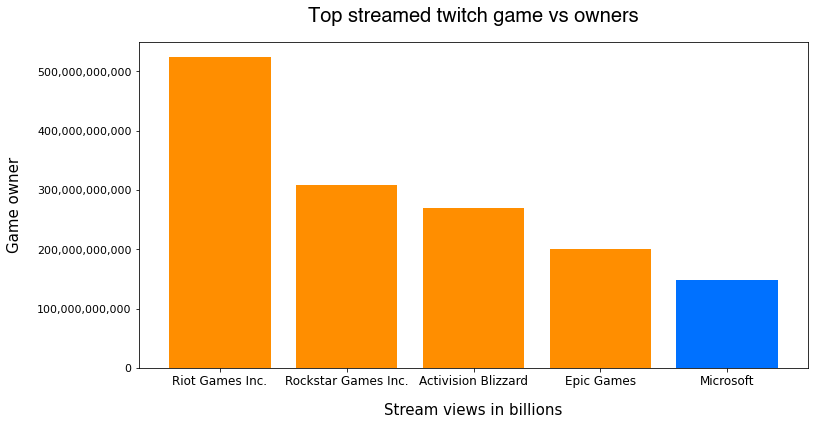

In [228]:
import matplotlib.ticker as ticker

#X values #height value
x = top_5_streamed['owner']
y = top_5_streamed['watch_time_min']

# resizing & design
fig = plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# setting labels
plt.title('Top streamed twitch game vs owners',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Stream views in billions',labelpad = 15, fontdict = {'fontsize' : 15})
plt.ylabel('Game owner', labelpad = 15, fontdict = {'fontsize' : 15})

# making the bar
genre_graph = plt.bar(x, y,color=('#0071ff'));

#changing color based on value
mask1 = top_5_streamed['owner'] == "Microsoft"
mask2 = top_5_streamed['owner'] != "Microsoft"

plt.bar(x[mask1], y[mask1], color = '#0071ff')
plt.bar(x[mask2], y[mask2], color = '#FF8E00')


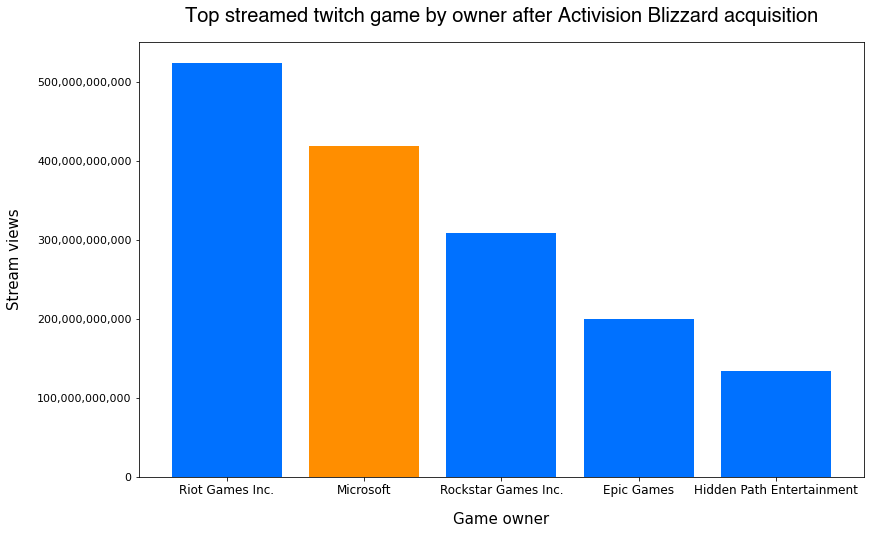

In [229]:
import matplotlib.ticker as ticker

#X values #height value
x = top_5_streamed_merg['owner_after_merger']
y = top_5_streamed_merg['watch_time_min']

# resizing & design
fig = plt.figure(figsize=(13, 8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'};

# making the bar
genre_graph = plt.bar(x, y,)

#changing color based on value
mask1 = top_5_streamed_merg['owner_after_merger'] != "Microsoft"
mask2 = top_5_streamed_merg['owner_after_merger'] == "Microsoft"

plt.bar(x[mask1], y[mask1], color = '#0071ff')
plt.bar(x[mask2], y[mask2], color = '#FF8E00')

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# setting labels
plt.title('Top streamed twitch game by owner after Activision Blizzard acquisition',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20)
plt.ylabel('Stream views',labelpad = 15, fontdict = {'fontsize' : 15})
plt.xlabel('Game owner', labelpad = 15, fontdict = {'fontsize' : 15});



In [230]:
aggregation_functions = {'watch_time_min': 'sum', 'stream_time_min': 'sum', 'owner': 'first', 'owner_after_merger': 'first'}
df_new = twitch_2021.groupby(twitch_2021['game_title']).aggregate(aggregation_functions).reset_index()

In [231]:
df_new_top = df_new.sort_values(by=['watch_time_min'], ascending=False).head(10)

In [232]:
df_new_top 

,game_title,watch_time_min,stream_time_min,owner,owner_after_merger
24,Grand Theft Auto V,308857222520,4487903640,Rockstar Games Inc.,Rockstar Games Inc.
27,League of Legends,301401976720,6234130440,Riot Games Inc.,Riot Games Inc.
48,VALORANT,183684784200,7023512940,Riot Games Inc.,Riot Games Inc.
21,Fortnite,153230095740,10167417780,Epic Games,Epic Games
29,Minecraft,136467091740,5128127460,Microsoft,Microsoft
9,Counter-Strike: Global Offensive,134087924940,2375117220,Hidden Path Entertainment,Hidden Path Entertainment
8,Call of Duty: Warzone,128476125240,5603616240,Activision Blizzard,Microsoft
2,Apex Legends,122286777060,7680645780,Respawn Entertainment,Respawn Entertainment
13,Dota 2,101353308660,1443882840,Valve Corp.,Valve Corp.
50,World of Warcraft,68165307420,2282014680,Activision Blizzard,Microsoft


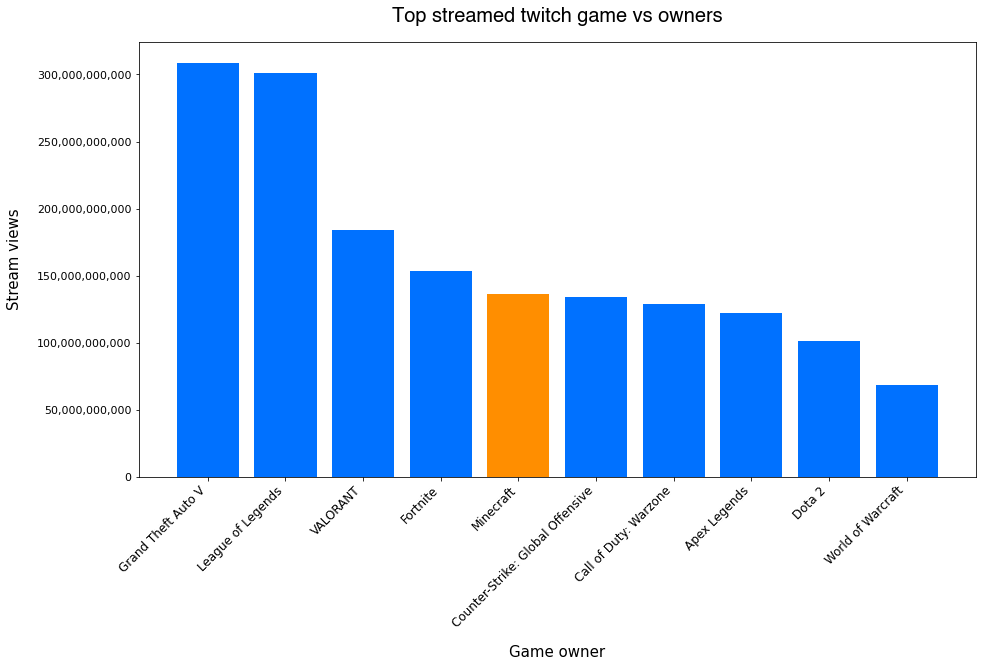

In [233]:
#X values #height value
x = df_new_top['game_title']
y = df_new_top['watch_time_min']

# resizing & design
fig = plt.figure(figsize=(15, 8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'};
plt.xticks(rotation=45, ha="right")

# making the bar
genre_graph = plt.bar(x, y, color=('#0071ff'), align="center") ;

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

#changing color based on value
mask1 = df_new_top['owner'] != "Microsoft"
mask2 = df_new_top['owner'] == "Microsoft"

plt.bar(x[mask1], y[mask1], color = '#0071ff')
plt.bar(x[mask2], y[mask2], color = '#FF8E00')

# setting labels
plt.title('Top streamed twitch game vs owners',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20)
plt.ylabel('Stream views',labelpad = 15, fontdict = {'fontsize' : 15})
plt.xlabel('Game owner', labelpad = 15, fontdict = {'fontsize' : 15});


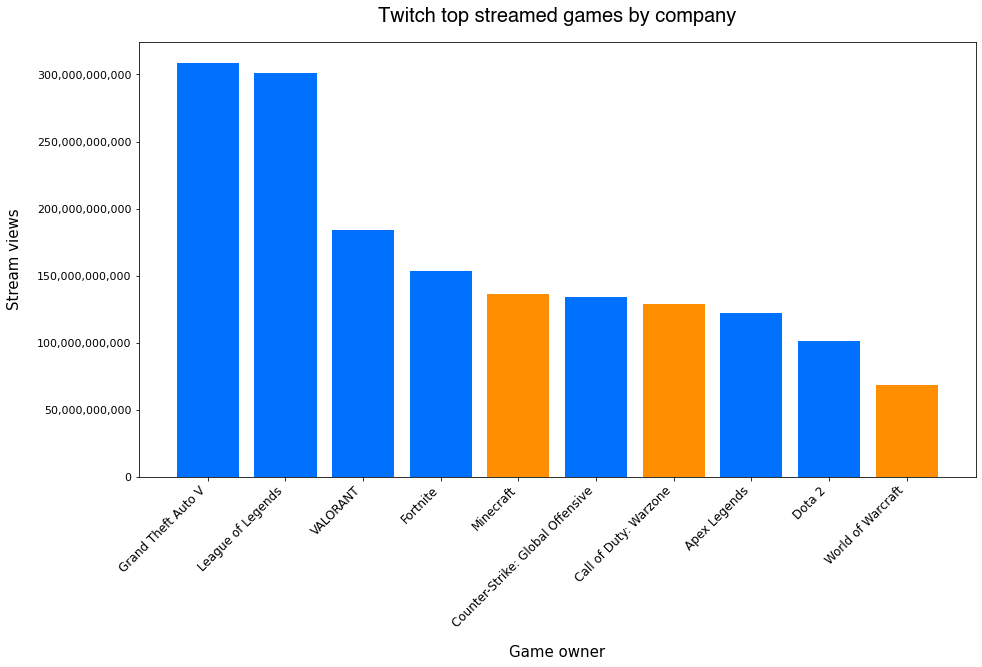

In [234]:
#X values #height value
x = df_new_top['game_title']
y = df_new_top['watch_time_min']

# resizing & design
fig = plt.figure(figsize=(15, 8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'};
plt.xticks(rotation=45, ha="right")

# making the bar
genre_graph = plt.bar(x, y, color=('#0071ff'), align="center") ;

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

#changing color based on value
mask1 = df_new_top['owner_after_merger'] != "Microsoft"
mask2 = df_new_top['owner_after_merger'] == "Microsoft"

plt.bar(x[mask1], y[mask1], color = '#0071ff')
plt.bar(x[mask2], y[mask2], color = '#FF8E00')

# setting labels
plt.title('Twitch top streamed games by company',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20)
plt.ylabel('Stream views',labelpad = 15, fontdict = {'fontsize' : 15})
plt.xlabel('Game owner', labelpad = 15, fontdict = {'fontsize' : 15});

## Analyzing runtime from API dataset

In [235]:
movie_genre_rev_final.sort_values(by='revenue', ascending=False).head(10)

,id,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,revenue,budget,runtime,gross,a_binned
1165,19995,2009-12-15,Avatar,7.6,28563,28,12,14,878,0,2920357254,237000000,162,2683357254,"(150, 180]"
94,299534,2019-04-24,Avengers: Endgame,8.3,22771,12,878,28,0,0,2799439100,356000000,181,2443439100,"(180, 210]"
785,76600,2022-12-14,Avatar: The Way of Water,7.7,5657,878,12,28,0,0,2312335665,350000000,192,1962335665,"(180, 210]"
487,597,1997-11-18,Titanic,7.9,22511,18,10749,0,0,0,2187463944,200000000,194,1987463944,"(180, 210]"
2174,140607,2015-12-15,Star Wars: The Force Awakens,7.3,17804,12,28,878,14,0,2068223624,245000000,136,1823223624,"(120, 150]"
98,299536,2018-04-25,Avengers: Infinity War,8.3,26456,12,28,878,0,0,2046239637,300000000,149,1746239637,"(120, 150]"
300,634649,2021-12-15,Spider-Man: No Way Home,8.0,16897,28,12,878,0,0,1921847111,200000000,148,1721847111,"(120, 150]"
5067,135397,2015-06-12,Jurassic World,6.7,18873,28,12,878,53,0,1671537444,150000000,124,1521537444,"(120, 150]"
2912,420818,2019-07-12,The Lion King,7.1,8978,12,18,10751,0,0,1663075401,260000000,118,1403075401,"(90, 120]"
833,24428,2012-04-25,The Avengers,7.7,28279,878,28,12,0,0,1518815515,220000000,143,1298815515,"(120, 150]"


In [236]:
test_genre_3['a_binned'].value_counts()

NameError: name 'test_genre_3' is not defined

In [237]:
ex = movie_genre_rev_final['a_binned'].astype(str)
ex

0       (150.0, 180.0]
1       (120.0, 150.0]
4       (180.0, 210.0]
5       (180.0, 210.0]
6       (180.0, 210.0]
             ...      
7990    (120.0, 150.0]
7992      (60.0, 90.0]
7993    (120.0, 150.0]
7996      (60.0, 90.0]
7997     (90.0, 120.0]
Name: a_binned, Length: 5337, dtype: object

<ipython-input-238-3db75c52494f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genre_rev_final['a_binned'] = pd.cut(movie_genre_rev_final['runtime'],bins=np.arange(60,211,30))


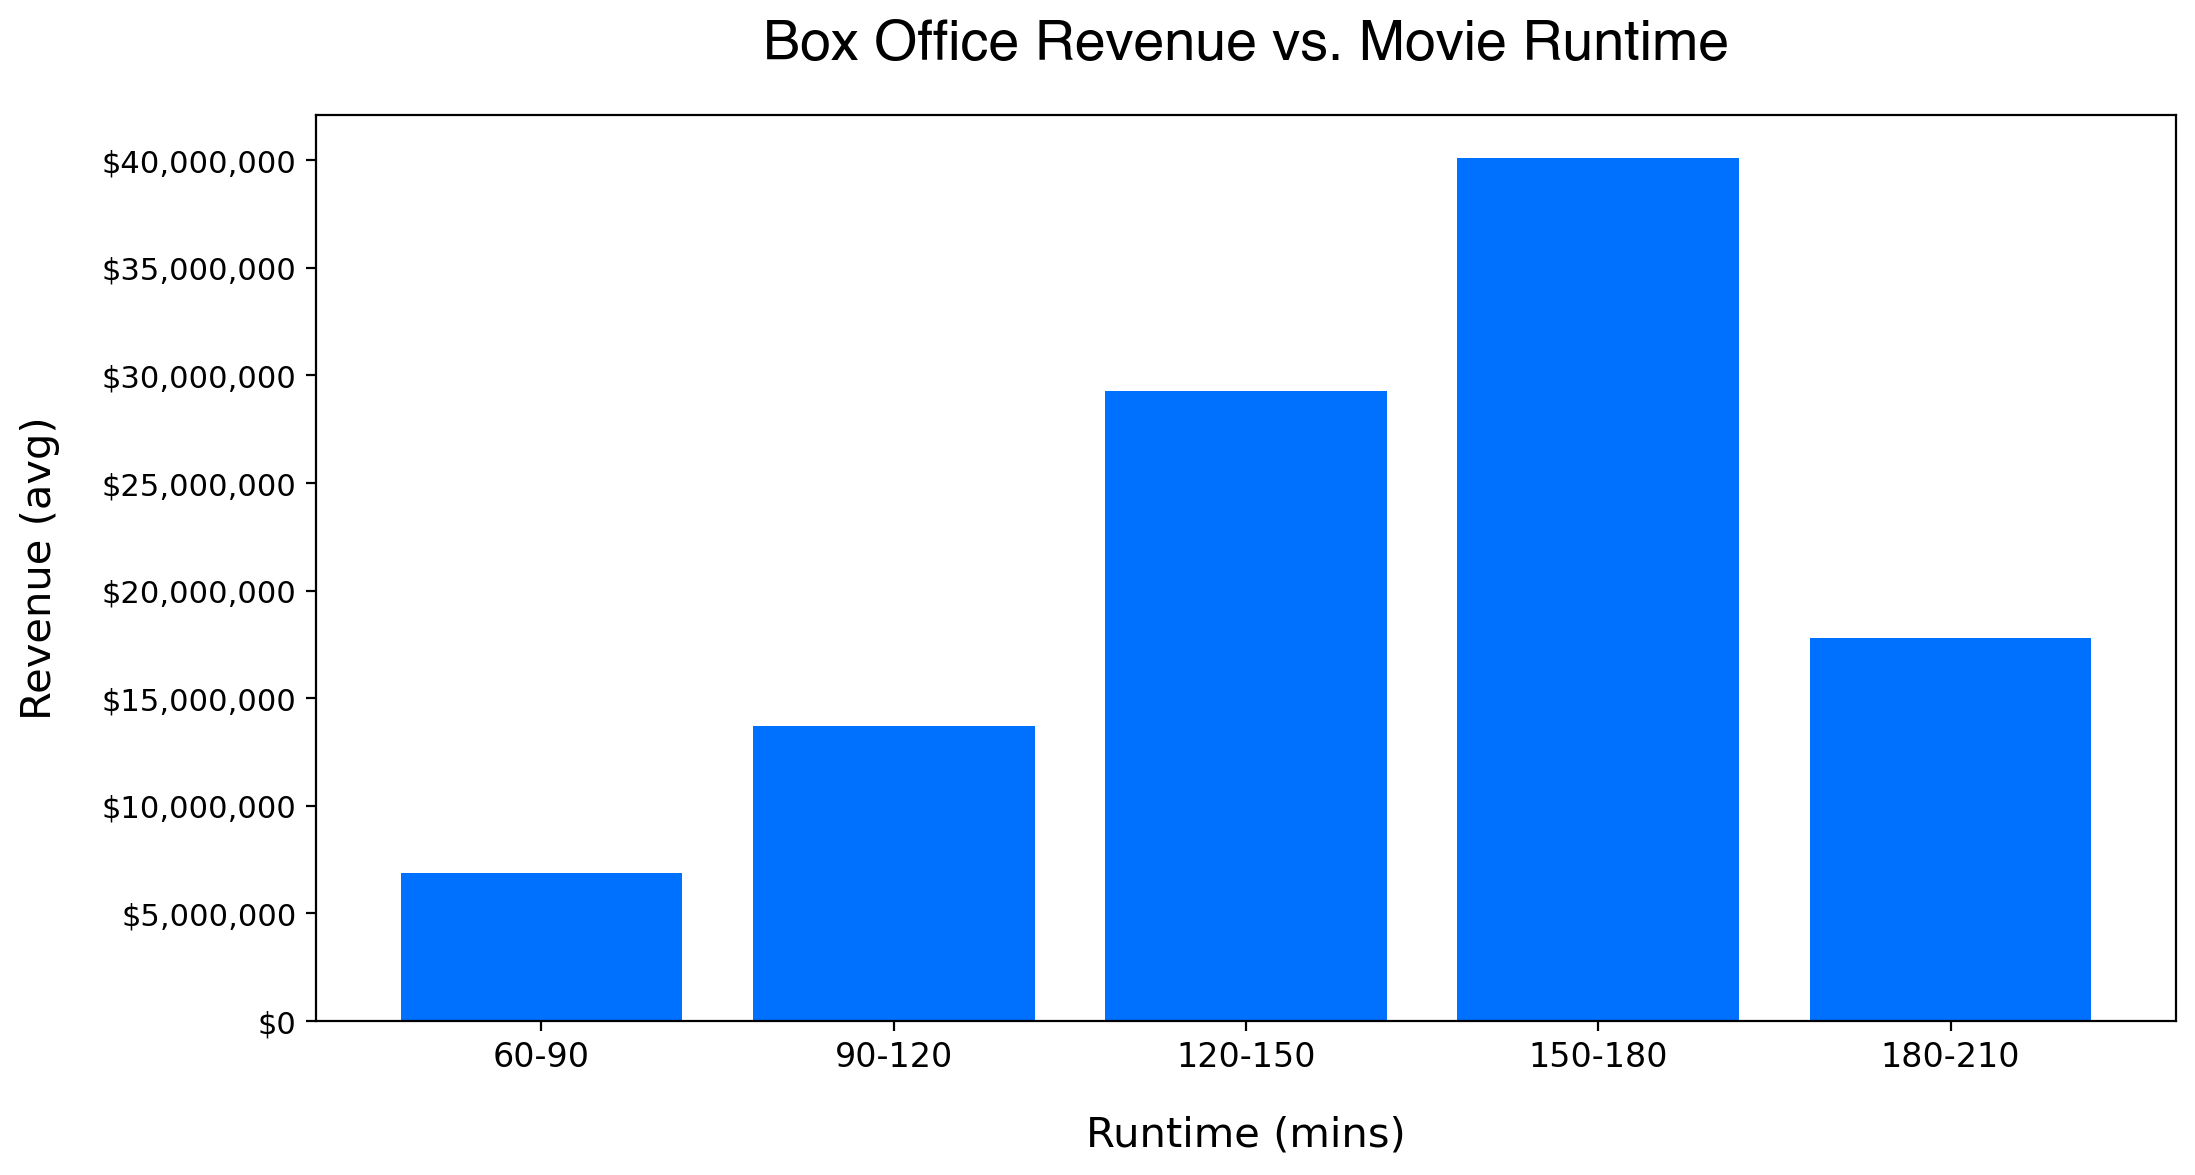

In [238]:
#binning runtime for graph an making new dataframe and updated string type for graphing
movie_genre_rev_final['a_binned'] = pd.cut(movie_genre_rev_final['runtime'],bins=np.arange(60,211,30))
movie_genre_df_binned = pd.DataFrame(movie_genre_rev_final.groupby(movie_genre_rev_final['a_binned'])['gross'].median()).reset_index()
movie_genre_df_binned['a_binned'] = movie_genre_df_binned['a_binned'].astype(str)

#creating new df for graph
movie_genre_df_binned_g = pd.DataFrame(movie_genre_df_binned).reset_index()
movie_genre_df_binned_g['a_binned'] = movie_genre_df_binned_g['a_binned'].astype(str)

X = movie_genre_df_binned_g['a_binned']
y = movie_genre_df_binned_g['gross']

# resizing & design
fig = plt.figure(figsize=(12, 6), dpi=200)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}
plt.grid(False)

#labeling axis
labels = ['60-90', '90-120', '120-150', '150-180','180-210']

plt.bar(x =X, height=y, color=('#0071ff'))
plt.xticks(range(len(movie_genre_df_binned_g)), labels)

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# setting labels
plt.title('Box Office Revenue vs. Movie Runtime',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Runtime (mins)',labelpad = 15, fontdict = {'fontsize' : 15})
plt.ylabel('Revenue (avg)', labelpad = 15, fontdict = {'fontsize' : 15});

In [239]:
#genre 1 - ACTION

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_one = movie_genre_rev_final[genre_columns_one].isin([12]).any(axis=1)
top_sub_genres_one = movie_genre_rev_final[sub_genre_one]
top_sub_genres_one

#genre 2 - ADVENTURE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5']
sub_genre_two = top_movies[genre_columns_two].isin([10402]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_12_10402 = pd.merge(top_sub_genres_one, top_sub_genres_two, how='outer')


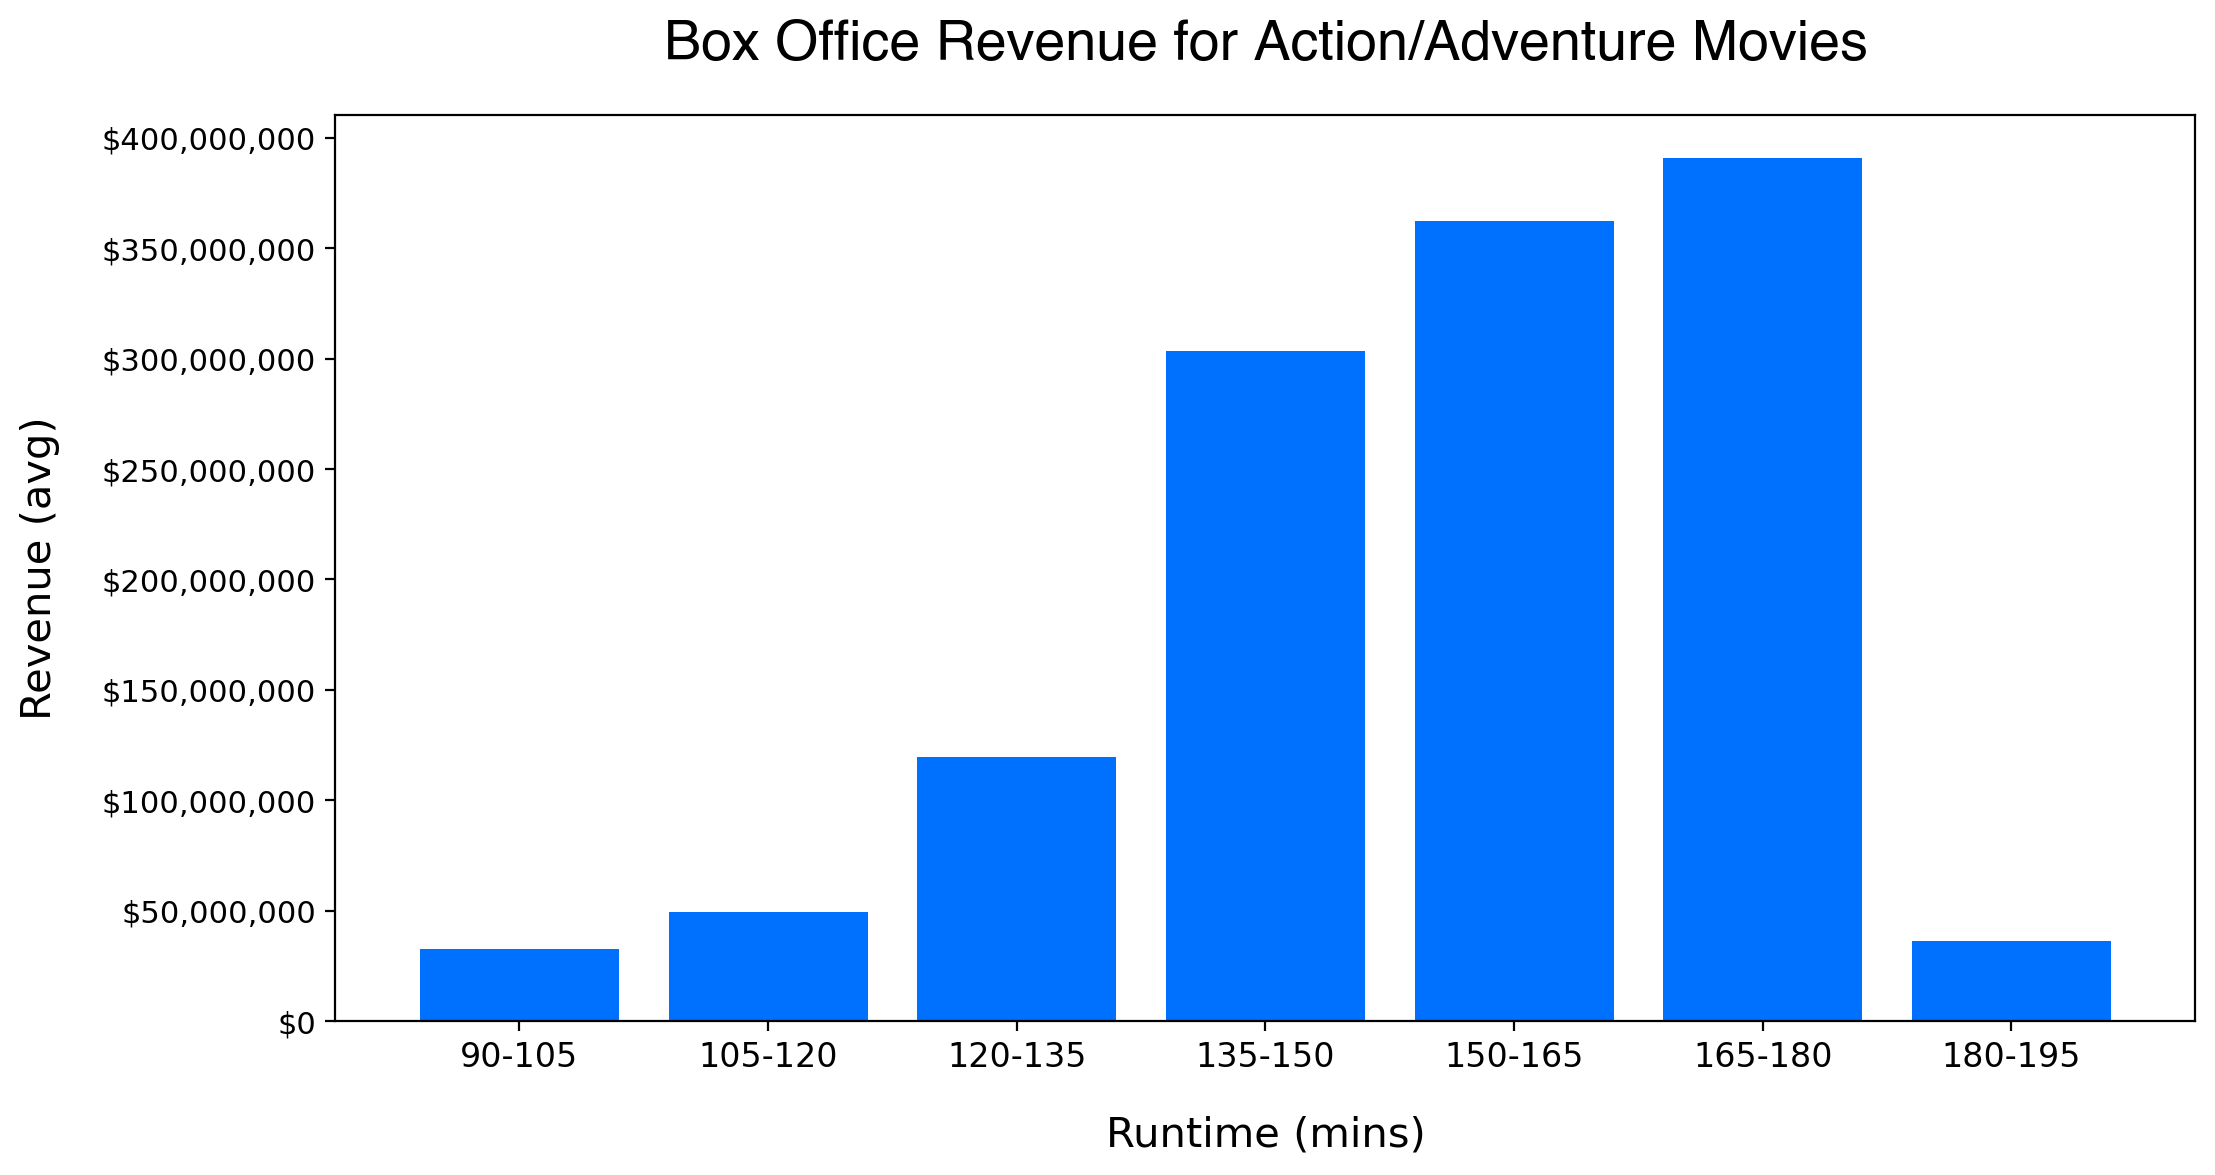

In [240]:
##ACTION ADVENTURE VIEW TIME

test_genre_3 = merged_genre_12_10402

#binning runtime for graph an making new dataframe and updated string type for graphing
test_genre_3['a_binned'] = pd.cut(test_genre_3['runtime'],bins=np.arange(90,210,15))
test_genre_3_binned=pd.DataFrame(test_genre_3.groupby(test_genre_3['a_binned'])['gross'].median()).reset_index()
test_genre_3_binned['a_binned'] = test_genre_3_binned['a_binned'].astype(str)

#creating new df for graph
test_genre_3_g = pd.DataFrame(test_genre_3_binned).reset_index()
test_genre_3_g['a_binned'] = test_genre_3_g['a_binned'].astype(str)

X = test_genre_3_g['a_binned']
y = test_genre_3_g['gross']

# resizing & design
fig = plt.figure(figsize=(12, 6), dpi=200)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}
plt.grid(False)


#labeling axis
labels = ['90-105', '105-120', '120-135', '135-150','150-165', '165-180', '180-195']

plt.bar(x =X, height=y, color=('#0071ff'))
plt.xticks(range(len(test_genre_3_g)), labels)

#adjusting y-value
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# setting labels
plt.title('Box Office Revenue for Action/Adventure Movies',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Runtime (mins)',labelpad = 15, fontdict = {'fontsize' : 15})
plt.ylabel('Revenue (avg)', labelpad = 15, fontdict = {'fontsize' : 15});